In [9]:
%pylab inline
%load_ext autoreload
%autoreload 2
from inpainting.dataset import Data, ResizeTransform
from gan.gan import Generator5Net, Discriminator5
from gan.trainer import GanTrainer
from torch.utils.data import DataLoader
import torch
import matplotlib.pyplot as plt
import pandas as pd
from inpainting.visualize import plot_batch
from inpainting.visualize import GanPlotLossCallback as PlotLossCallback
from inpainting import celeba_config as conf
from inpainting.visualizer import Visualizer

%matplotlib notebook

Without the incoming socket you cannot receive events from the server or register event handlers to your Visdom client.


Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
torch.cuda.set_device(0)

In [5]:

transform = ResizeTransform()
data = Data(conf.DATA_PATH, conf.Z_SIZE, transform)
data_loader = DataLoader(data, batch_size=conf.BATCH_SIZE, num_workers=conf.NUM_WORKERS, shuffle=True)
print('Dataset size: ', len(data))


Dataset size:  202599


In [7]:
generator = Generator5Net(conf.Z_SIZE).cuda()
discriminator = Discriminator5().cuda()

In [13]:
visualizer = Visualizer(conf.ENV_NAME)
trainer = GanTrainer(generator, discriminator, conf, visualizer=visualizer)

Without the incoming socket you cannot receive events from the server or register event handlers to your Visdom client.


In [14]:
if conf.CONTINUE_TRAINING:
    trainer.load_last_checkpoint()
    
trainer.train(data_loader, n_epochs=280)

Update losses
Update losses
Update losses
Update losses
Update losses
Update losses
Update losses
Update losses
Update losses
Update losses
Update losses
Update losses
Update losses
Update losses
Update losses
Update losses
Update losses
Update losses
Update losses
Update losses
Update losses
Update losses
Update losses
Update losses
Update losses
Update losses
Update losses
Update losses
Update losses


Process Process-30:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/red-haired/programming/inpainting/venv/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


KeyboardInterrupt: 

In [10]:

#print(Z)

tensor([[ 1.8307, -0.2602, -1.7820, -0.9923,  0.3051,  0.8523,  0.1468,
         -1.6428, -0.1286, -1.1731, -2.5091, -0.4575,  0.1769,  1.3189,
         -1.0830,  0.8586, -0.0031,  1.2339, -0.0026, -0.1130, -1.5624,
          0.8822, -1.2263,  0.4550, -2.0632,  0.4783, -2.7451,  0.9911,
         -0.3107, -1.6872, -0.2557,  0.9607, -0.8107, -0.8012, -2.2284,
          0.0102,  0.7794, -0.9828,  0.3473,  0.4681, -0.7351,  1.0933,
         -0.0636, -0.1289,  1.7876,  0.0795, -1.0996,  1.2146,  0.9892,
         -1.2441,  0.2528, -0.8565,  0.6095,  0.4950,  0.5277, -1.7238,
         -1.8258,  0.3929,  0.0484,  2.5564,  0.4598,  0.0592, -2.5452,
          0.7219, -0.1022,  0.4436, -0.5843, -0.3153, -0.6031, -1.2584,
         -0.1151, -0.2073, -2.2004,  1.5587,  2.2979,  0.5019,  0.4290,
          0.1358,  0.8879, -1.2404, -0.6883,  1.4252,  0.3508, -0.0374,
         -1.9984, -0.3522,  0.2310, -0.4234, -1.9883,  1.9122, -0.9175,
          2.0863,  1.4500, -1.0468, -0.7860,  1.6368, -0.3341,  

In [15]:
LOAD_MODEL = True
LOAD_EPOCH_N = 2
if LOAD_MODEL:
    generator.load_state_dict(torch.load(conf.MODEL_PATH + 'generator_%d.pth' % (LOAD_EPOCH_N,)))
    discriminator.load_state_dict(torch.load(conf.MODEL_PATH + 'discriminator_%d.pth' % (LOAD_EPOCH_N,)))

Without the incoming socket you cannot receive events from the server or register event handlers to your Visdom client.


<IPython.core.display.Javascript object>


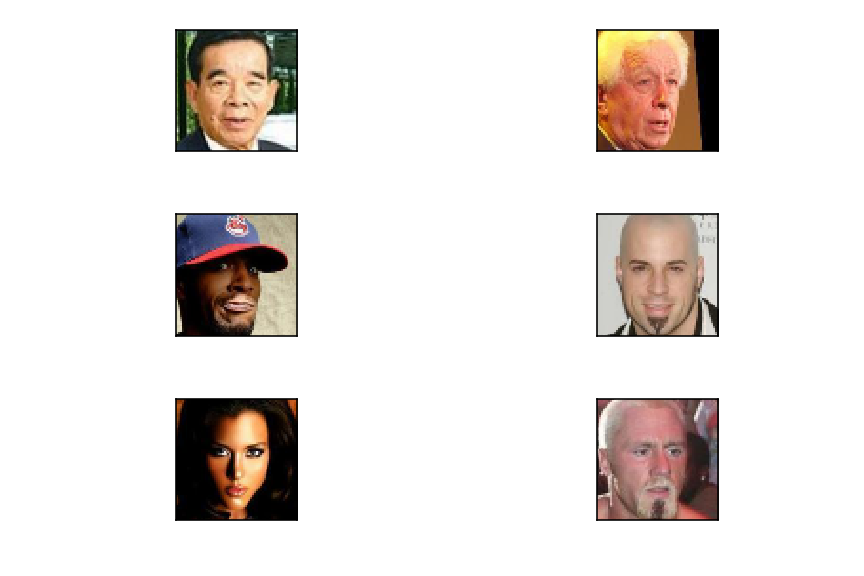

In [16]:
for batch, Z in data_loader:
    plot_batch((batch.data.cpu().numpy() + 1)/2, limit=6)
    break

[[ 0.03497382  0.02342096  0.03289624 ...  0.00246403 -0.03716598
   0.02035441]]


<IPython.core.display.Javascript object>


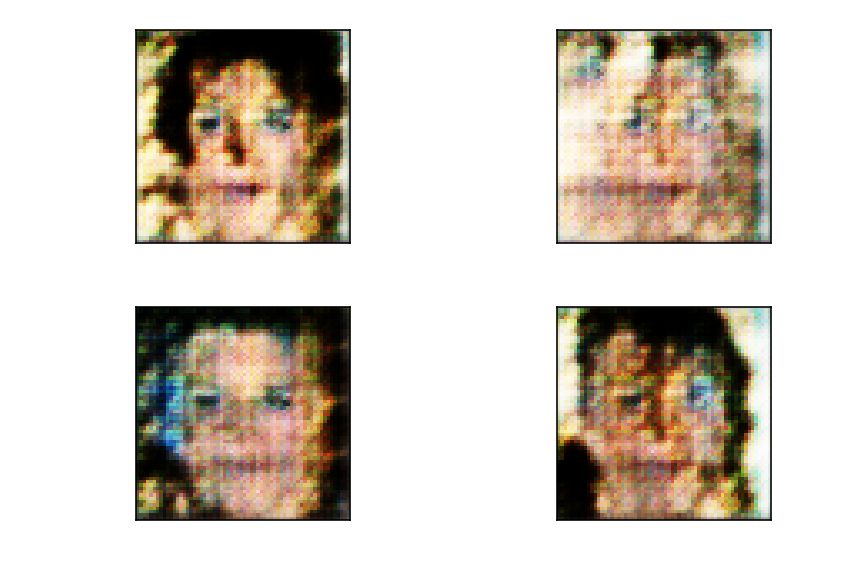

In [18]:
Z = torch.normal(mean=torch.zeros(4, generator.z_size)).cuda()
G_sample = generator(Z)
sample = G_sample.data.cpu().numpy()
print(discriminator.layer4.weight.cpu().detach().numpy())
plot_batch((G_sample.data.cpu().numpy() + 1) / 2)

In [19]:
w = generator.layer3[0].weight.data.cpu().numpy()
print(w)

[[[[-3.56839690e-03 -3.40416934e-03  2.45410623e-03 -1.03417982e-03
     1.66139856e-03]
   [-7.98866246e-03 -9.60865617e-03  6.48446241e-03 -1.48285134e-02
    -8.14846717e-03]
   [ 8.81382264e-03  9.10010189e-03  1.07116364e-02 -1.30536640e-02
    -1.06638239e-03]
   [-4.29586042e-03 -1.61795523e-02 -3.60659370e-03  4.06826893e-03
     8.41622986e-03]
   [ 1.22447796e-02 -5.79284783e-03  5.94175479e-04 -3.18090827e-03
    -5.73595474e-03]]

  [[-5.34680346e-03 -5.43569820e-03 -2.18870328e-03  3.07468628e-03
    -2.32869643e-03]
   [ 8.71349592e-03 -1.48212882e-02 -1.33597916e-02  1.91359466e-03
     8.76023667e-04]
   [ 4.91537945e-03 -8.23062938e-03  1.99597981e-03 -1.13878455e-02
     2.11121701e-03]
   [-6.89223781e-03 -3.04017006e-03 -1.14603154e-02 -5.90009615e-03
     6.41132239e-04]
   [ 1.72838494e-02  1.06846076e-02 -1.57227535e-02  4.53692535e-03
    -1.04301656e-02]]

  [[ 6.13592856e-04  5.65254223e-03  7.15018669e-03 -2.23766104e-03
     1.87603803e-03]
   [ 7.99109787e-

In [20]:
for batch, Z in data_loader:
    X = batch.cuda()
    Z = Z.cuda()
    G_sample = generator(Z)
    D_real, D_logit_real = discriminator(X)
    D_fake, D_logit_fake = discriminator(G_sample)
    print('D_real', D_real,'\n', 'D_fake', D_fake)
    print('D_logit_real', D_logit_real, '\n', 'D_logit_fake', D_logit_fake)
    break
    

D_real tensor([[ 0.7654],
        [ 0.8857],
        [ 0.7924],
        [ 0.8064],
        [ 0.7098],
        [ 0.6942],
        [ 0.6902],
        [ 0.8884],
        [ 0.6930],
        [ 0.7921],
        [ 0.8608],
        [ 0.7501],
        [ 0.9182],
        [ 0.9033],
        [ 0.8488],
        [ 0.8254],
        [ 0.8081],
        [ 0.9068],
        [ 0.7457],
        [ 0.6751],
        [ 0.8180],
        [ 0.7468],
        [ 0.8791],
        [ 0.5574],
        [ 0.8276],
        [ 0.7257],
        [ 0.6951],
        [ 0.7379],
        [ 0.9163],
        [ 0.8684],
        [ 0.8822],
        [ 0.8844],
        [ 0.7390],
        [ 0.7745],
        [ 0.7684],
        [ 0.7263],
        [ 0.9385],
        [ 0.5097],
        [ 0.8643],
        [ 0.7605],
        [ 0.8518],
        [ 0.8242],
        [ 0.6800],
        [ 0.8682],
        [ 0.7568],
        [ 0.9063],
        [ 0.7985],
        [ 0.8778],
        [ 0.7266],
        [ 0.7956],
        [ 0.8218],
        [ 0.8008],
     